To build a model to predict whether someone is going to make a deposit or not depending on some attributes.

For better marketing campaings in the future based on the previous(this) marketing campaign.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#To remove waarnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import files
data= files.upload()

Saving bank.csv to bank.csv


Input variables:

age (numeric)

job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')

marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)

education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')

default: has credit in default? (categorical: 'no','yes','unknown')
housing: has housing loan? (categorical: 'no','yes','unknown')

loan: has personal loan? (categorical: 'no','yes','unknown')

contact: contact communication type (categorical: 'cellular','telephone')

month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')

day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')

duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

pdays: number of days that passed by after the client was last contacted from a 
previous campaign (numeric; 999 means client was not previously contacted)

previous: number of contacts performed before this campaign and for this client (numeric)

poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

Output variable (desired target):

y. has the client subscribed a term deposit? (binary: 'yes','no')
According to the dataset documentation, we need to remove the 'duration' column because in real-case the duration is only known after the label column is known. This problem can be considered to be 'data leakage' where predictors include data that will not be available at the time you make predictions.

In [ ]:
df= pd.read_csv('bank.csv')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In this case we want to focus on the recall value of our model because in our problem we should try to predict as many actual positive as we can. Because a misclassification of customer who actually wanted to make a deposit can mean a lose opportunity/revenue.

**My thought process:**

1)Understand problem statement: future campaign focus based on deposit classification. Where to focus(which feature)?
2) ML problem: Binary classification 
3)Understand data: read, features(which type), size, cols, describe, unique for categorical, data balance.
4)NUll(missing), duplicate, distribution of data (to get sense of feature and outliers).


In [ ]:
#duration says how long customer had a conversation (time)
#because when we get new data or runtime, will don't know about that, so
#It can cause data leakage problem.
df= df.drop('duration', axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  campaign   11162 non-null  int64 
 12  pdays      11162 non-null  int64 
 13  previous   11162 non-null  int64 
 14  poutcome   11162 non-null  object
 15  deposit    11162 non-null  object
dtypes: int64(6), object(10)
memory usage: 1.4+ MB


In [ ]:
df.describe() #it descibes your all numerical data type columns

,age,balance,day,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,63.000000,854.000000,58.000000


In [ ]:
df.describe(include='all') #all columns details

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,deposit
count,11162.000000,11162,11162,11162,11162,11162.000000,11162,11162,11162,11162.000000,11162,11162.000000,11162.000000,11162.000000,11162,11162
unique,NaN,12,3,4,2,NaN,2,2,3,NaN,12,NaN,NaN,NaN,4,2
top,NaN,management,married,secondary,no,NaN,no,no,cellular,NaN,may,NaN,NaN,NaN,unknown,no
freq,NaN,2566,6351,5476,10994,NaN,5881,9702,8042,NaN,2824,NaN,NaN,NaN,8326,5873
mean,41.231948,NaN,NaN,NaN,NaN,1528.538524,NaN,NaN,NaN,15.658036,NaN,2.508421,51.330407,0.832557,NaN,NaN
std,11.913369,NaN,NaN,NaN,NaN,3225.413326,NaN,NaN,NaN,8.420740,NaN,2.722077,108.758282,2.292007,NaN,NaN
min,18.000000,NaN,NaN,NaN,NaN,-6847.000000,NaN,NaN,NaN,1.000000,NaN,1.000000,-1.000000,0.000000,NaN,NaN
25%,32.000000,NaN,NaN,NaN,NaN,122.000000,NaN,NaN,NaN,8.000000,NaN,1.000000,-1.000000,0.000000,NaN,NaN
50%,39.000000,NaN,NaN,NaN,NaN,550.000000,NaN,NaN,NaN,15.000000,NaN,2.000000,-1.000000,0.000000,NaN,NaN
75%,49.000000,NaN,NaN,NaN,NaN,1708.000000,NaN,NaN,NaN,22.000000,NaN,3.000000,20.750000,1.000000,NaN,NaN


check unique values in the categorical dtype

In [ ]:
#checking null values
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [ ]:
df.nunique()  

age            76
job            12
marital         3
education       4
default         2
balance      3805
housing         2
loan            2
contact         3
day            31
month          12
campaign       36
pdays         472
previous       34
poutcome        4
deposit         2
dtype: int64

In [ ]:
print(list(df['job'].unique()))

['admin.', 'technician', 'services', 'management', 'retired', 'blue-collar', 'unemployed', 'entrepreneur', 'housemaid', 'unknown', 'self-employed', 'student']


In [ ]:
df.duplicated().sum()   #there is no duplicate rows, if we got, we will drop those rows

1

In [ ]:
df.value_counts('deposit')

deposit
no     5873
yes    5289
dtype: int64

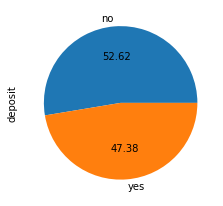

In [ ]:
plt.figure(figsize=(20,12))

plt.subplot(3,3,1)
df['deposit'].value_counts().plot(kind='pie',autopct='%.2f')
plt.show()

Its almost balanced. so we treat as a balanced dataset.

**You should do numeric standardized**

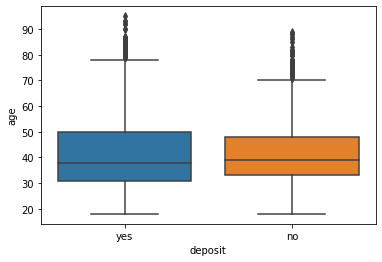

In [ ]:
#I want to know the distribution of data. To getting sense of data spread, outliers etc.
sns.boxplot(x='deposit',y='age', data=df)
plt.show()

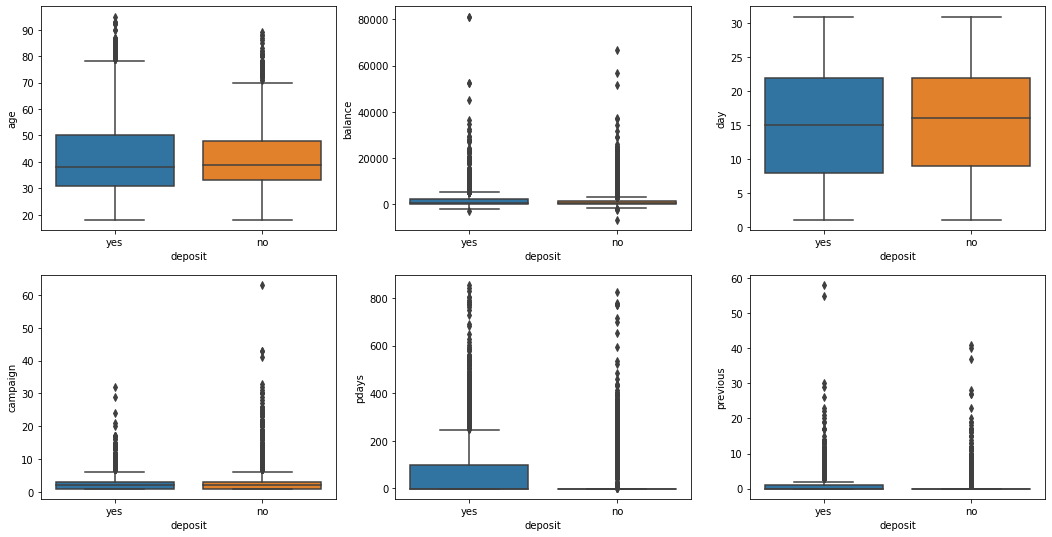

In [ ]:
plt.figure(figsize=(18,14))

plt.subplot(3,3,1)
sns.boxplot(x='deposit',y='age', data=df)
plt.subplot(3,3,2)
sns.boxplot(x='deposit',y='balance', data=df)
plt.subplot(3,3,3)
sns.boxplot(x='deposit',y='day', data=df)
plt.subplot(3,3,4)
sns.boxplot(x='deposit',y='campaign', data=df)
plt.subplot(3,3,5)
sns.boxplot(x='deposit',y='pdays', data=df)
plt.subplot(3,3,6)
sns.boxplot(x='deposit',y='previous', data=df)
plt.show()

To see distribution of data of each input feature with target variable.
Found some insights of featr as well, for example: I can say that between 8th to 22nd 'day' of every month, by using day boxplot. People generally respond and buy.
for checking outliers. Apart from Iqr, we can consider out but not getting how to read.

Here, we are not saying about outliers r8 now

<AxesSubplot:>

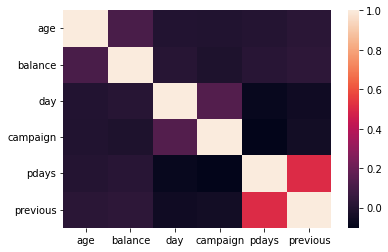

In [ ]:
sns.heatmap(df.corr())

In [ ]:
#checking correlation between columns,continous(numerical)
df.corr()

,age,balance,day,campaign,pdays,previous
age,1.000000,0.112300,-0.000762,-0.005278,0.002774,0.020169
balance,0.112300,1.000000,0.010467,-0.013894,0.017411,0.030805
day,-0.000762,0.010467,1.000000,0.137007,-0.077232,-0.058981
campaign,-0.005278,-0.013894,0.137007,1.000000,-0.102726,-0.049699
pdays,0.002774,0.017411,-0.077232,-0.102726,1.000000,0.507272
previous,0.020169,0.030805,-0.058981,-0.049699,0.507272,1.000000


No corr b/w columns except pdays and previous has some corr (50%). So there's no multi-colinearity.
Multicollinearity can also cause instability in the model, leads to affect model performance.

1) Remove one of the correlated variables: If two or more variables are highly correlated, then removing one of the variables can help reduce the multicollinearity.

2) Combine the correlated variables: If two or more variables are highly correlated, then you can create a new variable by taking a linear combination of those variables. For example, if two variables x1 and x2 are highly correlated, then you can create a new variable x3 = ax1 + bx2, where a and b are constants.

3) Use regularization techniques: Regularization techniques like Ridge Regression and Lasso Regression can help reduce the impact of multicollinearity on the model.

4) Use dimensionality reduction techniques: Techniques like Principal Component Analysis (PCA) and Factor Analysis can help reduce the number of variables in the dataset by combining the correlated variables into new variables, called principal components or factors.

In [ ]:
df.groupby('deposit').mean()

,age,balance,day,campaign,pdays,previous
deposit,,,,,,
no,40.837391,1280.227141,16.108122,2.839264,35.685340,0.528350
yes,41.670070,1804.267915,15.158253,2.141047,68.702968,1.170354


Here, the diff of 0 & 1 of each category will tell us about the feature that it will help us to classify or not.
Here, balance,pdays are important. But, cant say about feture importance.

In [ ]:
df1= df
df1

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,2,172,5,failure,no


In [ ]:
df1['deposit'] = df1['deposit'].replace({'yes': 1, 'no': 0})
#df1['deposit'] = df1['deposit'].apply(lambda x: 1 if x == 'yes' else 0)   can use Lambda function as well
df1

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1,-1,0,unknown,1
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1,-1,0,unknown,1
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1,-1,0,unknown,1
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,1,-1,0,unknown,1
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,2,-1,0,unknown,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,1,-1,0,unknown,0
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,4,-1,0,unknown,0
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,2,-1,0,unknown,0
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,2,172,5,failure,0


In [ ]:
df1.corr()['deposit']

age         0.034901
balance     0.081129
day        -0.056326
campaign   -0.128081
pdays       0.151593
previous    0.139867
deposit     1.000000
Name: deposit, dtype: float64

from these, I can say that theres no high corr with deposit. Correlation is not right for knowing feature impo. (in general)

In [ ]:
#To know feature importance but later realised that's not the way to know fetr impo
X=df1[['age', 'balance', 'day', 'pdays', 'campaign', 'previous']]
y=df1['deposit']

from sklearn.linear_model import SGDClassifier
#model= LogisticRegression(SGDClassifier)
model= SGDClassifier(loss='log', random_state= 42)    
#random_state(typically 42)- consistent result & to shuffle the data, 
#improves model performance on test data 
model.fit(X, y)
print(model.coef_)

[[  24.68009285 -540.59239992  -70.26319891   19.40800526 -783.69089265
   374.32336656]]


By this, age, day, campaign impacts much on model. But cant say about feature impo

By examining the coefficients, we can infer which independent variables are most strongly associated with the dependent variable and in which direction.

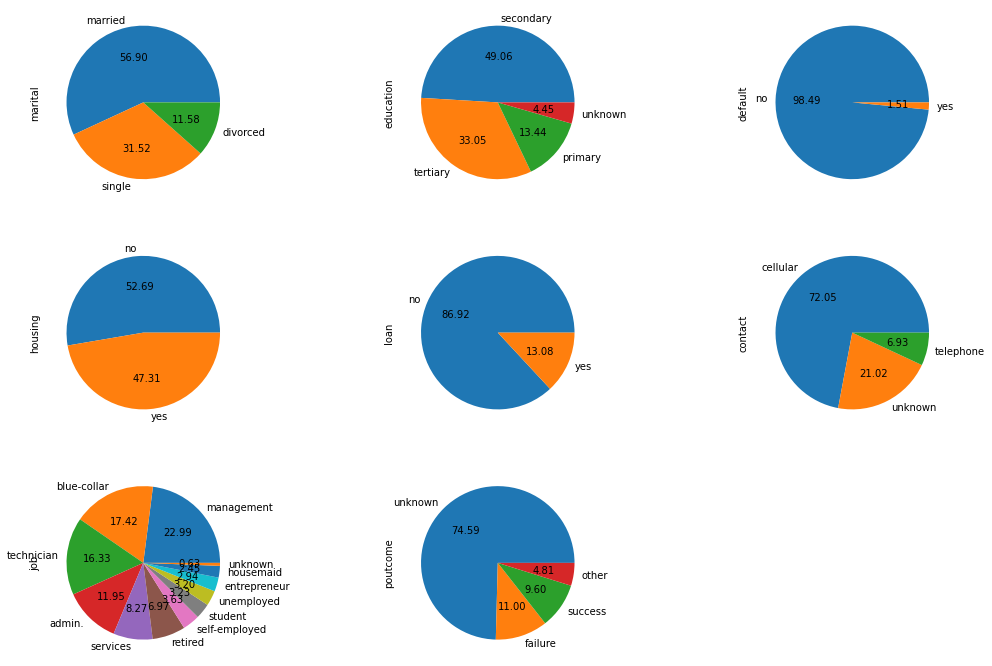

In [ ]:
#understanding categorical features
plt.figure(figsize=(18,12))

plt.subplot(3,3,1)
df['marital'].value_counts().plot(kind='pie',autopct='%.2f')
plt.subplot(3,3,2)
df['education'].value_counts().plot(kind='pie',autopct='%.2f')
plt.subplot(3,3,3)
df['default'].value_counts().plot(kind='pie',autopct='%.2f')
plt.subplot(3,3,4)
df['housing'].value_counts().plot(kind='pie',autopct='%.2f')
plt.subplot(3,3,5)
df['loan'].value_counts().plot(kind='pie',autopct='%.2f')
plt.subplot(3,3,6)
df['contact'].value_counts().plot(kind='pie',autopct='%.2f')
plt.subplot(3,3,7)
df['job'].value_counts().plot(kind='pie',autopct='%.2f')
plt.subplot(3,3,8)
df['poutcome'].value_counts().plot(kind='pie',autopct='%.2f')

plt.show()

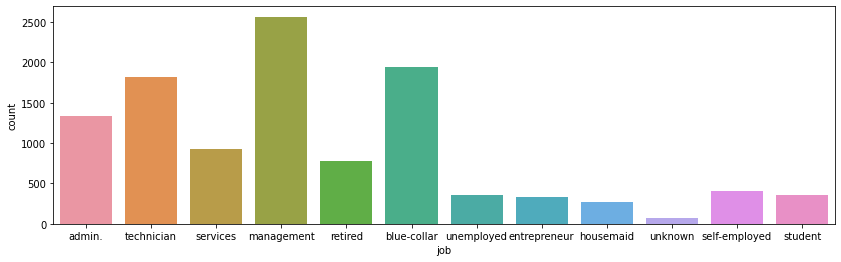

In [ ]:
plt.figure(figsize=(14,4))
plt.subplot(1,1,1)
sns.countplot(x=df1['job'])

plt.show()

<AxesSubplot:xlabel='job', ylabel='count'>

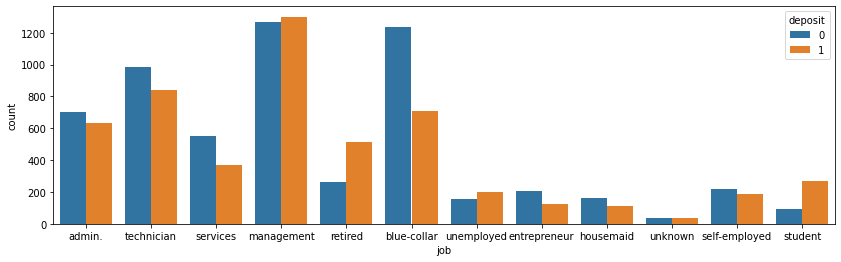

In [ ]:
plt.figure(figsize=(14,4))
sns.countplot(x='job', hue='deposit', data=df)

<AxesSubplot:xlabel='marital', ylabel='count'>

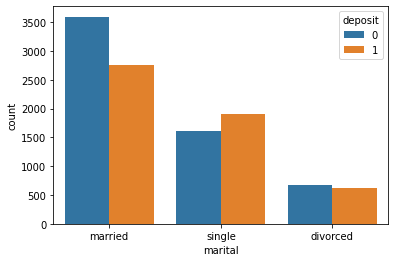

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x='marital', hue='deposit', data=df)

Important eda step, will tell about distribution as well as split of classification. We can do for all features using loop & we should do.

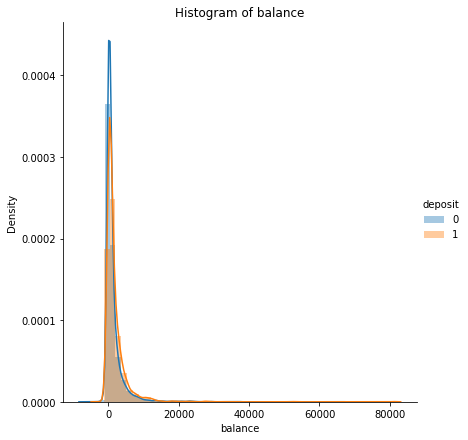

In [ ]:
# plotting histogram (smooth line is pdf)
sns.FacetGrid(df, hue="deposit", size= 6) \
   .map(sns.distplot, "balance") \
   .add_legend();
plt.title('Histogram of balance')
plt.show();

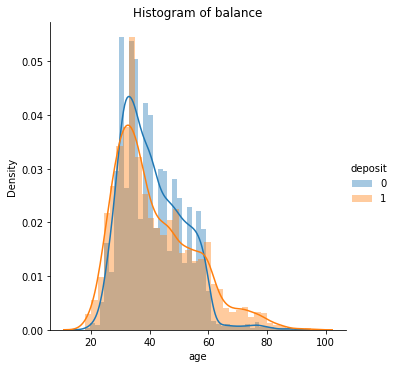

In [ ]:
# plotting histogram (smooth line is pdf)
sns.FacetGrid(df, hue="deposit", size= 5) \
   .map(sns.distplot, "age") \
   .add_legend();
plt.title('Histogram of balance')
plt.show();

[7.77011288e-01 2.05697904e-01 1.21841964e-02 3.31481813e-03
 1.07507615e-03 8.95896793e-05 2.68769038e-04 8.95896793e-05
 8.95896793e-05 1.79179359e-04]
[-6847.   1958.1 10763.2 19568.3 28373.4 37178.5 45983.6 54788.7 63593.8
 72398.9 81204. ]


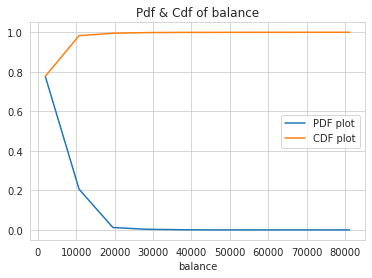

In [ ]:
#Plot CDF of age

sns.set_style('whitegrid')
counts, bin_edges = np.histogram(df['balance'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
#compute CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)

plt.title('Pdf & Cdf of balance')
plt.legend(['PDF plot', 'CDF plot'])
plt.xlabel("balance")
plt.show();

In [ ]:
#Encoding

df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,1
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,1
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,1
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,1
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,1


In [ ]:
one_hot_data = pd.get_dummies(df, columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome'])
one_hot_data.head()

,age,balance,day,campaign,pdays,previous,deposit,job_admin.,job_blue-collar,job_entrepreneur,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,59,2343,5,1,-1,0,1,1,0,0,...,0,0,1,0,0,0,0,0,0,1
1,56,45,5,1,-1,0,1,1,0,0,...,0,0,1,0,0,0,0,0,0,1
2,41,1270,5,1,-1,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,55,2476,5,1,-1,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
4,54,184,5,2,-1,0,1,1,0,0,...,0,0,1,0,0,0,0,0,0,1


In [ ]:
from sklearn.model_selection import train_test_split

X= one_hot_data.drop('deposit', axis=1)
y= one_hot_data['deposit']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state= 10)

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
model= LogisticRegression() 
#random_state(typically 42)- consistent result & to shuffle the data, improves model performance on test data 
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
y_pred= model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(acc)

0.7694834278889221
0.767990444908928

0.6757240967452971


0.767990444908928

In [ ]:
from sklearn.metrics import log_loss
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

logloss = log_loss(y_test, model.predict_proba(X_test)[:, 1])
print("Log loss:", logloss)

Log loss: 0.6240731714250114


In [ ]:
one_hot_data = one_hot_data.drop(one_hot_data.columns[-1], axis=1)
X= one_hot_data
y

0        1
1        1
2        1
3        1
4        1
        ..
11157    0
11158    0
11159    0
11160    0
11161    0
Name: deposit, Length: 11162, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

X= one_hot_data.drop('deposit', axis=1)
y= one_hot_data['deposit']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state= 10)

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
model= LogisticRegression() 
#random_state(typically 42)- consistent result & to shuffle the data, improves model performance on test data 
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
y_pred= model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(acc)

0.6700507614213198


In [ ]:
from sklearn.metrics import log_loss
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

logloss = log_loss(y_test, model.predict_proba(X_test)[:, 1])
print("Log loss:", logloss)

Log loss: 0.6294125520323491


In [ ]:
X= one_hot_data.drop(['deposit', 'age', 'day'], axis=1)
y= one_hot_data['deposit']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state= 10)

In [ ]:
model= LogisticRegression() 
#random_state(typically 42)- consistent result & to shuffle the data, improves model performance on test data 
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
y_pred= model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(acc)

0.6888623469692445


In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_train)

logloss = log_loss(y_train, model.predict_proba(X_train)[:, 1])
print("Log loss:", logloss)

Log loss: 0.6003881383142997


In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

logloss = log_loss(y_test, model.predict_proba(X_test)[:, 1])
print("Log loss:", logloss)

Log loss: 0.6077395811972804


After dropping age & day column, performance increases

There is no overfitting & underfitting in the data

In [ ]:
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, y_pred)
print('AUC:', auc)

AUC: 0.6867499046647842


<AxesSubplot:>

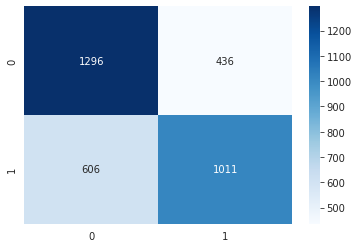

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')

In [ ]:
#Linear SVM
from sklearn.svm import LinearSVC
model = LinearSVC()

# Train the model on the training data
model.fit(X_train, y_train)

# Predict the target variable for the test data
y_pred = model.predict(X_test)

# Evaluate the model's performance
accuracy = model.score(X_test, y_test)
print(accuracy)

0.5753956404896984


SVM has less acc than LR

In [ ]:
#Random forest: Random forest or Random Decision Forest is a method that 
#operates by constructing multiple decision trees during training phases. 
#The decision of the majority of the trees is chosen as final decision.
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=30, random_state=42)

rf.fit(X_train, y_train)

# Evaluate the classifier on the test data
accuracy = rf.score(X_test, y_test)

print("Accuracy: {:.2f}".format(accuracy))

Accuracy: 0.68


In [ ]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

logloss = log_loss(y_test, rf.predict_proba(X_test)[:, 1])
print("Log loss:", logloss)

Log loss: 0.6398147695530514


Random Forest gives better performance (accuracy & loss) than LR